<p style="text-align:center;">
  <img src="recursos/imagenes/portada.jpg" style="width: 250px;" />
</p>
<h1 style="text-align: center; font-size: 50px; color:#0C90D2 ;">Con Python, cada desafío tiene su solución.</h1>
<h3 style="text-align: center; font-size: 30px; color:#0C90D2 ;">Generación de nube de palabras</h3>

# Contenido:

* [Nube de palabras](#sec1)
* [Práctica](#sec2)
    - [Requsitos](#subsec1)
    - [Importación de librerías](#subsec2)
    - [Funciones a usar](#subsec3)
    - [Cargue de la data](#subsec4)
    - [Cargue de Stopwords](#subsec5)
    - [Limpieza](#subsec6)
    - [Nube de palabras](#subsec7)

# Generación de nubes de palabras

<a class="anchor" id="sec1"></a>
## ¿Qué es una nube de palabras?

Una nube de palabras es una representación visual de un conjunto de palabras donde el tamaño de cada palabra está determinado por su frecuencia o importancia dentro de un texto o corpus. Las palabras más frecuentes aparecen en un tamaño más grande, mientras que las menos frecuentes son más pequeñas. Se utiliza en análisis de texto para identificar rápidamente los términos más relevantes en un documento o colección de documentos.

La librería WordCloud en Python procesa un texto y genera la nube de palabras automáticamente.

<a class="anchor" id="sec2"></a>
## Práctica

El objetivo del ejercicio es generar nubes de palabras a partir de un texto, permitiendo visualizar de manera rápida e intuitiva las palabras más relevantes. Esta técnica facilita el análisis exploratorio del contenido, destacando términos con mayor frecuencia de aparición y proporcionando una representación gráfica que ayuda a identificar patrones y temas clave.

<a class="anchor" id="subsec1"></a>
### Requsitos

Antes de iniciar se deben tener en cuenta las siguientes recomendaciones:

* Opcional:
    * Tener python 3, preferible >=3.8
    * Crear un entorno virtual
* Obligatorio:
    * instalar unidecode y wordcloud:
        * Con conda:
          ```
          conda install conda-forge::unidecode
          conda install conda-forge::wordcloud
          ```      
        * Con pip:
          ```
          pip install unidecode
          pip install wordcloud
          ```

<a class="anchor" id="subsec2"></a>
### Importación de librerías

In [1]:
# Importamos librerias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from unidecode import unidecode
from wordcloud import WordCloud

<a class="anchor" id="subsec3"></a>
### Funciones a usar

Para realizar la limpieza de la información usaremos algunas funciones que nos ayuden:

In [2]:
# Funciones de limpieza
def sin_puntuacion(texto):
    '''
    Elimina caracteres especiales de un texto dado.

    Parameters
    ----------
    texto : str
        Texto a limpiar.

    Returns
    -------
    texto_limpio : str
        Retorna el texto sin caracteres especiales.
    '''
    simbolos = ".,;:¿?¡!()[]{}\"'«»-—/…*|#@$°¬~&%+=<>^_¨"
    texto_limpio = texto.translate(str.maketrans("", "", simbolos))
    return texto_limpio

Para generar la nube de palabrsa y poderla visualizar, usaremos:

In [3]:
# Funciones de generacion y ploteo
def nube_palabras(texto, stopwords, mask=None):
    '''
    Genera una nube de palabras a partir de una lista de palabras.

    Parameters
    ----------
    texto : list
        Lista que contiene las palabras del texto.
    stopwords : str
        Lista de palabras stopwords.
    mask : numpy.array, optional
        Imagen en forma de arreglo usada para plantilla de fondo.
        El valor por defecto es None.

    Returns
    -------
    wordcloud : WordCloud
        Nube de palabras.
    '''
    wordcloud = WordCloud(max_font_size=50,
                          #width=800,
                          #height=600,
                          max_words=300,
                          background_color="white",
                          mask=mask,     
                          stopwords=stopwords).generate(" ".join(texto))
    return wordcloud

def plot_nube(wordcloud, save_path=None):
    '''
    Genera la gráfica de la nube de palabras y permite guardarla como imagen.

    Parameters
    ----------
    wordcloud : WordCloud
        Nube de palabras.
    save_path : str, optional
        Ruta y nombre del archivo donde se guardará la imagen. Si es None, no se guarda.

    Returns
    -------
    None.
    '''
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    if save_path:
        wordcloud.to_file(save_path)

<a class="anchor" id="subsec4"></a>
### Cargue de la data

Para llevar a cabo nuestra práctica, es necesario cargar un archivo que contenga el texto a analizar y visualizar en la nube de palabras. Este archivo servirá como fuente de datos para identificar y resaltar los términos más frecuentes, permitiendo una representación gráfica que facilite la interpretación del contenido.

**Nota:** El archivo se carga en forma de lista, donde cada palabra del texto se convierte en un elemento individual. Este enfoque permite aplicar eficientemente las funciones de limpieza a cada término de manera independiente, facilitando la normalización del texto y garantizando un procesamiento más preciso para la generación de la nube de palabras.

In [4]:
# leer el texto
with open("recursos/data/Los Misteriosos Agujeros Negros.txt", "r", encoding="utf-8") as file:
    documento = file.read().split()
documento[0:10]

['Los',
 'Misteriosos',
 'Agujeros',
 'Negros',
 'Los',
 'agujeros',
 'negros',
 'son',
 'una',
 'de']

<a class="anchor" id="subsec5"></a>
### Cargue de Stopwords

Las stopwords son palabras comunes en un idioma que, en muchos casos, no aportan significado relevante en tareas de procesamiento de lenguaje natural (PLN) y se eliminan para mejorar la eficiencia del análisis de texto. Estas palabras incluyen artículos, preposiciones, pronombres y conjunciones, como el, la, de, y, en, un, entre otras en español.

La librería WordCloud permite carga stopwords de forma nativa, pero del idioma inglés, por lo cual cargamos nuestro propio conjunto.

**Nota:** Las palabras cargadas en este archivo vienen formateadas en minúscula y sin acentos.

In [5]:
# Cargue stopwords
# Se lee el texto y las palabras se almacenan en una lista
with open("recursos/data/spanish-stop-words.txt", "r", encoding="utf-8") as file:
    stopwords = [line.strip() for line in file]
stopwords[0:10]

['a',
 'actualmente',
 'adelante',
 'ademas',
 'afirmo',
 'agrego',
 'ahora',
 'ahi',
 'al',
 'algo']

<a class="anchor" id="subsec6"></a>
### Limpieza

Una vez cargado el archivo que se pretende analizar, es necesario realizar un proceso de limpieza del texto. Este proceso incluye la normalización a minúsculas y la eliminación de acentos, lo que garantiza una mejor consistencia en el análisis y evita que palabras equivalentes se traten como términos distintos debido a diferencias en mayúsculas o caracteres acentuados.

In [6]:
# Normaliza cada palabra
documento = [unidecode(sin_puntuacion(palabra)).lower() for palabra in documento]
documento[0:10]

['los',
 'misteriosos',
 'agujeros',
 'negros',
 'los',
 'agujeros',
 'negros',
 'son',
 'una',
 'de']

<a class="anchor" id="subsec7"></a>
### Nube de palabras

Es el momento de generar nuestra nube de palabras. Para ello, utilizaremos la función `nube_palabras`, que construimos previamente. Esta función recibe como argumentos el texto a analizar y la lista de stopwords (palabras irrelevantes o de uso común que deseamos excluir).

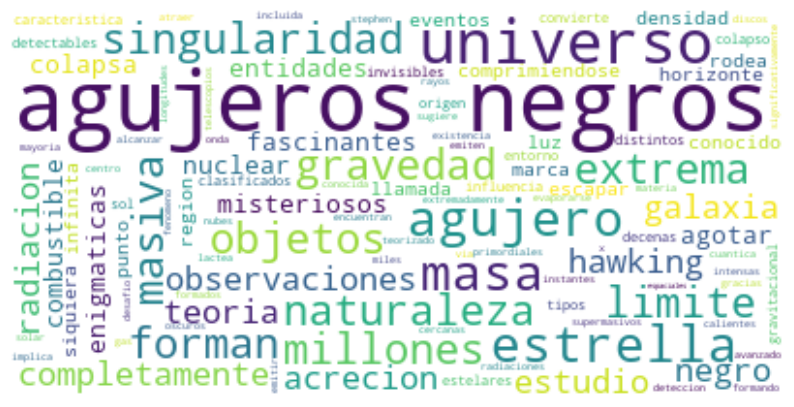

In [7]:
# Genera la nube de palabras
wordcloud = nube_palabras(documento, stopwords)
# Genera la imagen y la guarda
plot_nube(wordcloud, save_path="recursos/imagenes/nube.jpg")

Podemos aplicar una plantilla para que la nube de palabras adopte una forma específica. Es importante que la imagen utilizada como plantilla tenga un fondo blanco, ya que las palabras se distribuirán en las áreas coloreadas de la imagen. De esta manera, podemos personalizar la visualización y hacer que la nube de palabras adopte formas representativas o temáticas según el contexto del análisis.

In [8]:
# Abre la imagen de mascara
img = Image.open ("recursos/imagenes/fondo.jpg")
# convierte la imagen en una matriz
mask = np.array(img)

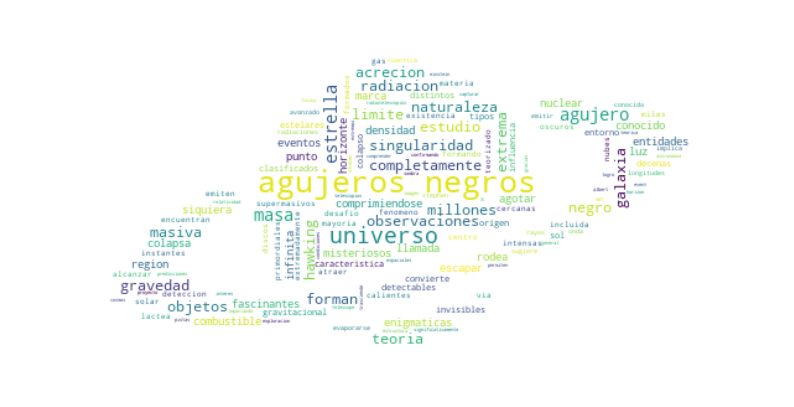

In [9]:
# Genera la nube de palabras
wordcloud = nube_palabras(documento, stopwords, mask)
# Genera la imagen y la guarda
plot_nube(wordcloud, save_path="recursos/imagenes/nube_plantilla.jpg")